In [1]:
### import radd
#criterion = df2['a'].map(lambda x: x.startswith('t'))
from radd import build, CORE, models, fit, dfhandler
from radd.tools import analyze
from itertools import takewhile
from scipy.stats.mstats_extras import mjci
homedir = os.path.expanduser('~')

ssb = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SSBayes/alldata_clean.csv"))
udf = ssb[ssb.cond.isin(['uniform'])]
edf = ssb[ssb.cond.isin(['early'])]
ldf = ssb[ssb.cond.isin(['late'])]

re = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SS/Reactive/Re_Data.csv"), index_col=0)
cox = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/Coxon/coxon_behav_data_binned.csv"))

inits = {'a': 0.45, 'v': 1.26, 'xb': 1.3, 'ssv': -1.3, 'tr': 0.2}

In [2]:
popt_flat = {'a': 0.5878,  'ssv': -1.1539, 'tr': 0.120, 'v': 0.95904, 'xb': 1.845}

In [32]:
me = build.Model(data=edf, inits=popt_flat, kind='xdpm', fit_on='average')# depends_on={'v':'Cond'})
mu = build.Model(data=udf, inits=popt_flat, kind='xdpm', fit_on='average')# depends_on={'v':'Cond'})
ml = build.Model(data=ldf, inits=popt_flat, kind='xdpm', fit_on='average')# depends_on={'v':'Cond'})

In [11]:
mr = build.Model(data=re, inits=popt_flat, kind='xdpm', fit_on='average')# depends_on={'v':'Cond'})

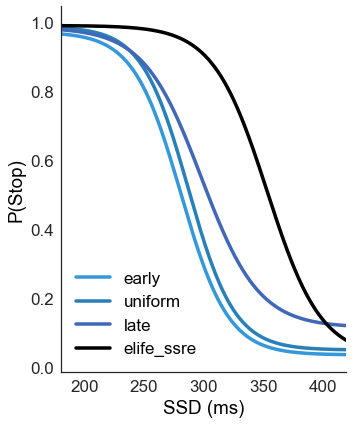

In [52]:
f, ax = plt.subplots(1, figsize=(5,6))
labels=['early', 'uniform', 'late', 'elife_ssre']
for i, m in enumerate([me, mu, ml, mr]):
    vec = m.observed[0]
    if np.all(vec == mr.observed[0]):
        clr='k'
    else:
        clr = blues[i]
        
    vis.scurves([vec[1:6]], colors=[clr], ax=ax, labels=[labels[i]])
plt.savefig('scurves_ssbayes_ssre.png', dpi=600)